In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

churn = pd.read_csv(r'C:\Users\abram\Downloads\churn_clean.csv')
print(churn.head())
print(churn.info())

   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

In [2]:
churn.drop(['CaseOrder','Customer_id','Interaction', 'UID', 'Item1','Item2','Item3',
           'Item4','Item5','Item6','Item7','Item8', 'Churn'], axis=1, inplace = True)


churn.to_csv(r'C:\Users\abram\Downloads\d209_2_churn_clean', encoding='utf-8')

In [3]:
#Importing One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

#Transforming the categorical variables to type category
churn['City'] = churn['City'].astype('category')
churn['Area'] = churn['Area'].astype('category')
churn['TimeZone'] = churn['TimeZone'].astype('category')
churn['Job'] = churn['Job'].astype('category')
churn['State'] = churn['State'].astype('category')
churn['Gender'] = churn['Gender'].astype('category')
churn['Marital'] = churn['Marital'].astype('category')
churn['Port_modem'] = churn['Port_modem'].astype('category')
churn['Tablet'] = churn['Tablet'].astype('category')
churn['Techie'] = churn['Techie'].astype('category')
churn['Contract'] = churn['Contract'].astype('category')
churn['InternetService'] = churn['InternetService'].astype('category')
churn['Phone'] = churn['Phone'].astype('category')
churn['Multiple'] = churn['Multiple'].astype('category')
churn['TechSupport'] = churn['TechSupport'].astype('category')
churn['County'] = churn['County'].astype('category')
churn['Zip'] = churn['Zip'].astype('category')
churn['Marital'] = churn['Marital'].astype('category')
churn['OnlineSecurity'] = churn['OnlineSecurity'].astype('category')
churn['OnlineBackup'] = churn['OnlineBackup'].astype('category')
churn['DeviceProtection'] = churn['DeviceProtection'].astype('category')
churn['StreamingTV'] = churn['StreamingTV'].astype('category')
churn['StreamingMovies'] = churn['StreamingMovies'].astype('category')
churn['PaperlessBilling'] = churn['PaperlessBilling'].astype('category')
churn['PaymentMethod'] = churn['PaymentMethod'].astype('category')


#Storing variables as numerical category codes
churn['City_cat'] = churn['City'].cat.codes
churn['Area_cat'] = churn['Area'].cat.codes
churn['TZ_cat'] = churn['TimeZone'].cat.codes
churn['Job_cat'] = churn['Job'].cat.codes
churn['State_cat'] = churn['State'].cat.codes
churn['Gender_cat'] = churn['Gender'].cat.codes
churn['Techie01'] = churn['Techie'].cat.codes
churn['Contract_cat'] = churn['Contract'].cat.codes
churn['InternetService_cat'] = churn['InternetService'].cat.codes
churn['Multiple01'] = churn['Multiple'].cat.codes

churn['County_cat'] = churn['County'].cat.codes
churn['Zip_cat'] = churn['Zip'].cat.codes
churn['Marital_cat'] = churn['Marital'].cat.codes
churn['Modem'] = churn['Port_modem'].cat.codes
churn['Tablet01'] = churn['Tablet'].cat.codes
churn['Phone01'] = churn['Phone'].cat.codes
churn['DP'] = churn['DeviceProtection'].cat.codes
churn['STV'] = churn['StreamingTV'].cat.codes
churn['SMov'] = churn['StreamingMovies'].cat.codes
churn['PB'] = churn['PaperlessBilling'].cat.codes
churn['PM'] = churn['PaymentMethod'].cat.codes
churn['OB'] = churn['OnlineBackup'].cat.codes
churn['OS'] = churn['OnlineSecurity'].cat.codes
churn['TS'] = churn['TechSupport'].cat.codes



# Create an instance of One hot encoder
enc = OneHotEncoder()
  
# Passing encoded columns through One hot encoder
  
churn_enc = pd.DataFrame(enc.fit_transform(
    churn[['State_cat', 'Gender_cat','Techie01','Contract_cat','InternetService_cat', 'Multiple01',
         'City_cat', 'Area_cat', 'TZ_cat', 'Job_cat', 'Zip_cat', 'Marital_cat', 'Modem',
          'Tablet01', 'Phone01', 'DP', 'STV', 'SMov', 'PB', 'PM', 'OB', 'OS', 'TS']]).toarray())
  
# Merge with main
churn_enc= churn.join(churn_enc)

churn.drop(['County', 'Zip','City', 'State', 'Area', 'TimeZone', 'Job','Marital','Gender', 
            'Techie', 'Contract', 'Port_modem',
           'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity','OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],axis=1, inplace=True)

print(churn.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   10000 non-null  float64
 1   Lng                   10000 non-null  float64
 2   Population            10000 non-null  int64  
 3   Children              10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Income                10000 non-null  float64
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Tenure                10000 non-null  float64
 11  MonthlyCharge         10000 non-null  float64
 12  Bandwidth_GB_Year     10000 non-null  float64
 13  City_cat              10000 non-null  int16  
 14  Area_cat              10000 non-null  int8   
 15  TZ_cat              

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,City_cat,Area_cat,TZ_cat,Job_cat,State_cat,Gender_cat,Techie01,Contract_cat,InternetService_cat,Multiple01,County_cat,Zip_cat,Marital_cat,Modem,Tablet01,Phone01,DP,STV,SMov,PB,PM,OB,OS,TS
Lat,1.000000,-0.100639,-0.220598,-0.000452,-0.002943,0.006563,0.004827,-0.030042,-0.002213,-0.007125,-0.015743,0.001406,-0.016949,0.020470,0.010734,-0.062556,-0.005806,0.111427,-0.018062,0.009987,-0.008518,0.022667,-0.006479,0.035373,-0.050168,-0.011052,-0.019988,0.001608,-0.005639,0.017594,0.017822,-0.000064,0.020627,-0.012681,-0.013009,-0.005409,-0.009164
Lng,-0.100639,1.000000,-0.048294,0.013634,0.012117,-0.002997,0.005646,0.007872,0.008118,-0.005577,0.003618,0.011765,0.003446,-0.024748,-0.007889,0.304050,0.008581,0.242691,0.013443,-0.001746,0.010609,-0.000323,-0.007049,-0.045176,-0.888841,0.016088,-0.003269,0.018904,-0.006163,0.021181,-0.008576,0.010398,0.002424,-0.010692,0.015037,0.003072,-0.009469
Population,-0.220598,-0.048294,1.000000,-0.005877,0.010538,-0.008639,0.005483,0.017962,0.004019,-0.004483,-0.003559,-0.004778,-0.003902,-0.018429,-0.005373,0.139759,0.009747,-0.096055,-0.010659,-0.011483,0.013686,-0.006590,-0.001241,-0.007398,0.038886,-0.005016,0.008577,0.001225,0.008196,-0.003795,-0.006590,-0.005882,0.008656,-0.000579,0.010352,0.012549,-0.006606
Children,-0.000452,0.013634,-0.005877,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,-0.019620,-0.007879,0.005933,-0.007239,-0.008031,0.006032,-0.006884,0.023639,0.006013,-0.021969,-0.005332,-0.016753,0.000045,0.011283,0.001494,-0.001629,0.005477,-0.007106,0.003461,0.006828,0.000818,-0.000297,0.006937,0.000878
Age,-0.002943,0.012117,0.010538,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,-0.014724,-0.003964,0.011745,0.009905,0.009304,-0.007680,-0.005660,-0.007531,-0.010071,0.005027,-0.004674,0.001291,-0.008526,-0.009721,0.006081,-0.004384,0.009521,0.014489,-0.000197,0.010125,0.002247,-0.024085,0.003309,-0.011213,0.017155
Income,0.006563,-0.002997,-0.008639,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674,-0.007892,0.002557,-0.005384,0.013051,0.011632,-0.018436,0.005442,-0.002990,-0.012867,-0.000214,0.014326,0.002952,-0.005045,-0.014977,0.005999,-0.001677,0.014073,-0.003324,-0.002186,-0.012049,0.018082,-0.005974,-0.010385,0.008835
Outage_sec_perweek,0.004827,0.005646,0.005483,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,0.004176,-0.009305,0.000239,-0.004580,0.004112,0.009140,0.008887,-0.006264,0.013021,0.011747,0.012142,-0.000760,-0.011146,-0.016180,0.006326,0.005614,-0.010267,0.022008,0.008952,0.018086,-0.011208,-0.002490,0.000457,-0.002416,-0.013221
Email,-0.030042,0.007872,0.017962,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001997,-0.014579,-0.000479,-0.003444,0.011345,0.020613,0.005312,0.007882,-0.014047,-0.002403,0.000554,-0.002966,-0.000405,-0.007740,0.001838,0.014196,-0.008579,-0.007281,0.001520,0.005099,0.000711,-0.012632,0.000556,-0.011763,-0.024908,0.022119
Contacts,-0.002213,0.008118,0.004019,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,0.002820,0.004259,0.003299,-0.024652,0.000744,0.001556,0.006103,0.019219,0.002083,0.005343,0.006719,-0.015639,-0.016090,0.004669,-0.004096,-0.001853,-0.002219,-0.011855,0.005422,0.000497,0.000524,0.011002,-0.002649,-0.026121,0.010398,0.010922,-0.013009
Yearly_equip_failure,-0.007125,-0.005577,-0.004483,0.007321,0.008577,0.005423,0.002909,-0.016354,-0.006032,1.000000,0.012435,-0.007172,0.012034,0.012909,-0.006554,-0.017588,0.005926,-0.009127,0.014750,-0.008516,-0.001773,-0.004930,0.002213,0.021301,0.011802,0.001183,0.005686,0.003634,-0.007929,-0.005903,0.002597,-0.004473,0.016603,-0.001923,-0.011500,-0.016486,0.003735


<Axes: >

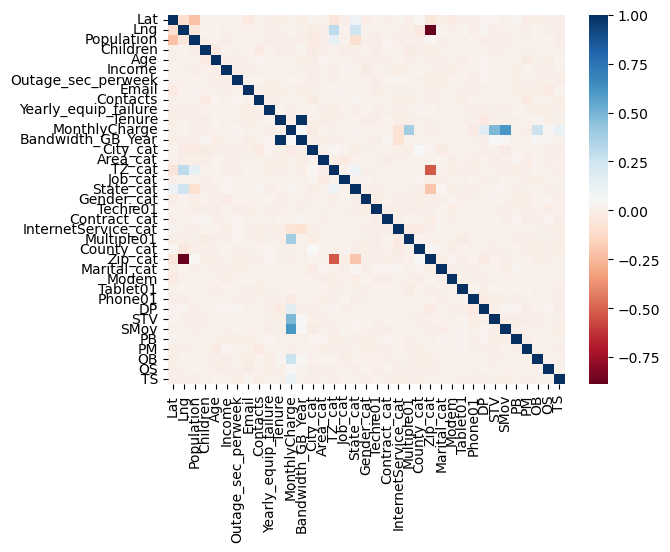

In [4]:
#ensure all columns show
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# calculate the correlation matrix
corr = churn.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [5]:
from sklearn.linear_model import Lasso

X=churn[['State_cat', 'Gender_cat','Techie01','Contract_cat','InternetService_cat', 'Multiple01',
         'City_cat', 'Area_cat', 'TZ_cat', 'Job_cat', 'Zip_cat', 'Marital_cat', 'Modem',
          'Tablet01', 'Phone01', 'DP', 'STV', 'SMov', 'PB', 'PM', 'OB', 'OS', 'TS', 'Lat','Lng', 'Contacts', 'Email',
         'Outage_sec_perweek', 'Population', 'Children', 'Age','Income', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge']]
y= churn[['Bandwidth_GB_Year']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_train.to_csv(r'C:\Users\abram\Downloads\d209_2_xtrain.csv', encoding='utf-8')

X_test.to_csv(r'C:\Users\abram\Downloads\d209_2_xtest.csv', encoding='utf-8')

y_train.to_csv(r'C:\Users\abram\Downloads\d209_2_ytrain.csv', encoding='utf-8')

y_test.to_csv(r'C:\Users\abram\Downloads\d209_2_ytest.csv', encoding='utf-8')

In [6]:

# Instantiate a lasso regressor: lasso
from sklearn.model_selection import GridSearchCV
 
# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
 
# Perform grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, y_train)
 
# Print best parameter values and score
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

Best Parameters: {'alpha': 0.1}
Best Score: 0.9985937306432913


In [7]:
from sklearn.preprocessing import StandardScaler
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
# Fit Lasso regression model
lasso = Lasso(alpha=.1)
lasso.fit(X_train, y_train)
 
# Evaluate model performance on test set
y_pred = lasso.predict(X_test)
 
# Model Score
print("Model Score: ", lasso.score(X_test, y_test))
 
# Lasso Coefficient
lasso.coef_

Model Score:  0.998620544599188


array([ 1.48667809e+00,  2.38925339e+01,  1.34644710e+00,  5.85446753e-01,
       -1.80343041e+02,  1.06498036e+02,  3.77376833e-01,  2.59353221e-01,
        1.67917000e+00, -3.30731356e-01,  2.38252399e+00, -5.75180252e-01,
       -4.84272695e-01, -2.81516058e-01, -3.39734147e-01,  6.98876576e+01,
        2.06074056e+02,  2.19697114e+02,  2.19257912e-01, -0.00000000e+00,
        9.50176838e+01,  4.15477333e+01,  2.91840659e+01, -8.32487090e-01,
        0.00000000e+00, -9.57121159e-02, -1.50164255e-01, -0.00000000e+00,
        3.36510668e-01,  6.62963432e+01, -6.78589960e+01,  2.43506936e-01,
       -3.94556526e-01,  2.16380148e+03, -1.88964816e+02])

In [8]:
pd.Series(lasso.coef_, index = X.columns )

State_cat                  1.486678
Gender_cat                23.892534
Techie01                   1.346447
Contract_cat               0.585447
InternetService_cat     -180.343041
Multiple01               106.498036
City_cat                   0.377377
Area_cat                   0.259353
TZ_cat                     1.679170
Job_cat                   -0.330731
Zip_cat                    2.382524
Marital_cat               -0.575180
Modem                     -0.484273
Tablet01                  -0.281516
Phone01                   -0.339734
DP                        69.887658
STV                      206.074056
SMov                     219.697114
PB                         0.219258
PM                        -0.000000
OB                        95.017684
OS                        41.547733
TS                        29.184066
Lat                       -0.832487
Lng                        0.000000
Contacts                  -0.095712
Email                     -0.150164
Outage_sec_perweek        -0

In [9]:
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

The train score for ls model is 0.9986105659534715
The test score for ls model is 0.998620544599188


In [10]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred = lasso.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred)**2)

6666.6207162548935

In [11]:
r2_score(y_test, y_pred)

0.998620544599188